In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
### Detector uses deplot.prototxt file which is SSD based face detector protxt file 

In [22]:
detector = cv2.dnn.readNetFromCaffe("deploy.prototxt" , 
                                    "res10_300x300_ssd_iter_140000.caffemodel")

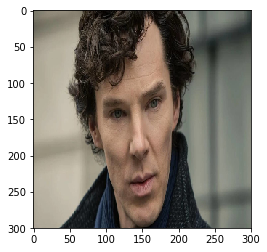

In [39]:
img = cv2.imread('batch1.jpg')
img = cv2.resize(img,(300,300))
plt.imshow(img[:,:,::-1])

In [40]:
img_blob = cv2.dnn.blobFromImage(img)
img_blob.shape

(1, 3, 300, 300)

In [41]:
detector.setInput(img_blob)
detections = detector.forward()

In [42]:
print(detections)
detections = detections[0][0]

[[[[0.         1.         0.9940445  ... 0.06418848 0.6380253
    0.990942  ]
   [0.         1.         0.08580848 ... 0.0339153  0.48015124
    0.18553543]
   [0.         1.         0.08492428 ... 0.5157673  0.6078061
    0.73532444]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


In [43]:
detections.shape

(200, 7)

In [44]:
df = pd.DataFrame(detections,
                  columns =['img_id','is_face','confidence','left','top','right','bottom'])
df.head()

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.994044,0.299880,0.064188,0.638025,0.990942
1,0.0,1.0,0.085808,0.394991,0.033915,0.480151,0.185535
2,0.0,1.0,0.084924,0.476705,0.515767,0.607806,0.735324
3,0.0,1.0,0.083462,0.331230,0.259601,0.411038,0.358100
4,0.0,1.0,0.083461,0.387449,0.095055,0.456972,0.186551


In [45]:
df = df[(df['is_face']==1) & (df['confidence']>=0.9)]
df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.994044,0.29988,0.064188,0.638025,0.990942


Img_Id 0.0
Is_Face 1.0
Confidence 0.9940445
Left 0.29987964
Top 0.06418848
Right 0.6380253
Bottom 0.990942


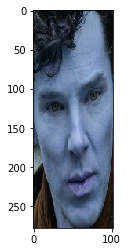

In [46]:
for i, data in df.iterrows():
    left = int(data['left']* 300)
    top = int(data['top']* 300)
    right = int(data['right']* 300)
    bottom = int(data['bottom']*300)
    print('Img_Id',data['img_id'])
    print('Is_Face',data['is_face'])
    print('Confidence',data['confidence'])
    print('Left',data['left'])
    print('Top',data['top'])
    print('Right',data['right'])
    print('Bottom',data['bottom'])
    detected_face = img[top:bottom,left:right]
    plt.imshow(detected_face)